In [ ]:
# mounted google drive
import google.colab as gc
gc.drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# check the path
!pwd

/content/drive/.shortcut-targets-by-id/1Atr52kQtpKI__DG99japz14wr8jXJe6S/Class-20210420-01/data_file


In [ ]:
# change folder
%cd '/content/drive/My Drive/Class-20210420-01/data_file'

/content/drive/.shortcut-targets-by-id/1Atr52kQtpKI__DG99japz14wr8jXJe6S/Class-20210420-01/data_file


In [ ]:
# check file in folder
!ls

'Assignment Day 20.ipynb'   melb_data.csv	 student_grade_prediction.xlsx
 data_student.pkl	   'property data.csv'	 USA_Housing.csv
 earthquake_data.csv	    quiz_data.json


In [ ]:
# import EDA library
import pandas as pd
import numpy as np
import seaborn as sns

# import sklearn library
import sklearn.preprocessing as preprocessing
import sklearn.model_selection as model_selection
import sklearn.linear_model as linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import max_error
from sklearn.metrics import r2_score
from sklearn import preprocessing

# import graph library
import matplotlib.pyplot as plt

# import statistic library
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# read the data
df = pd.read_excel('student_grade_prediction.xlsx')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,M,16,U,GT3,T,4,3,health,services,reputation,mother,1,4,0,no,no,no,yes,yes,yes,yes,no,4,2,2,1,1,2,4,19,19,20
1,GP,M,15,U,GT3,T,4,4,services,teacher,course,father,1,2,0,no,yes,no,yes,yes,yes,yes,no,4,3,3,1,1,5,2,19,18,18
2,MS,F,18,R,LE3,T,4,4,other,other,reputation,mother,2,3,0,no,no,no,no,yes,yes,yes,no,5,4,4,1,1,1,0,19,18,19
3,GP,F,17,U,GT3,T,4,4,services,teacher,home,mother,2,1,1,no,yes,no,no,yes,yes,yes,no,4,2,4,2,3,2,24,18,18,18
4,GP,M,15,U,LE3,T,4,2,teacher,other,course,mother,1,1,0,no,no,no,no,yes,yes,yes,no,3,5,2,1,1,3,10,18,19,19


In [ ]:
# simple data checking - get row and column of dataframe
print(df.shape)

(395, 33)


In [ ]:
# simple data checking - get columns name
print(df.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [ ]:
# simple data checking - get dataframe general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
# check standard missing value - multiple column
df[df.isnull().any(axis=1)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


In [ ]:
for i in df.columns:
  print(i)
  print(df[i].value_counts())

school
GP    349
MS     46
Name: school, dtype: int64
sex
F    208
M    187
Name: sex, dtype: int64
age
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64
address
U    307
R     88
Name: address, dtype: int64
famsize
GT3    281
LE3    114
Name: famsize, dtype: int64
Pstatus
T    354
A     41
Name: Pstatus, dtype: int64
Medu
4    131
2    103
3     99
1     59
0      3
Name: Medu, dtype: int64
Fedu
2    115
3    100
4     96
1     82
0      2
Name: Fedu, dtype: int64
Mjob
other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64
Fjob
other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64
reason
course        145
home          109
reputation    105
other          36
Name: reason, dtype: int64
guardian
mother    273
father     90
other      32
Name: guardian, dtype: int64
traveltime
1    257
2    107
3     23
4      8
Name: traveltime, dtype

# EXPERIMENT 1

In [ ]:
df_1 = pd.get_dummies(df, drop_first=True)
df_1.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,16,4,3,1,4,0,4,2,2,1,1,2,4,19,19,20,0,1,1,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,1,1,0
1,15,4,4,1,2,0,4,3,3,1,1,5,2,19,18,18,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,1,1,0
2,18,4,4,2,3,0,5,4,4,1,1,1,0,19,18,19,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1,1,0
3,17,4,4,2,1,1,4,2,4,2,3,2,24,18,18,18,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,1,1,0
4,15,4,2,1,1,0,3,5,2,1,1,3,10,18,19,19,0,1,1,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0


In [ ]:
df_1.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'school_MS', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other', 'schoolsup_yes', 'famsup_yes', 'paid_yes',
       'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes',
       'romantic_yes'],
      dtype='object')

In [ ]:
X = df_1.drop(['G3'], axis=1)
y = df_1['G3']

In [ ]:
# split the data into train and test by 80:20
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.8, random_state=0)

In [ ]:
# check the shape data
print('Shape Data X Train:')
print(X_train.shape)
print('\nShape Data X Test:')
print(X_test.shape)
print('\nShape Data y Train:')
print(y_train.shape)
print('\nShape Data y Test:')
print(y_test.shape)

Shape Data X Train:
(316, 41)

Shape Data X Test:
(79, 41)

Shape Data y Train:
(316,)

Shape Data y Test:
(79,)


In [ ]:
# load LinearRegression algorithm
regression_model = linear_model.LinearRegression()

# train the data
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# model result
print('Coefficients:\n',regression_model.coef_)
# print('\n')
print('Intercept:',regression_model.intercept_)

Coefficients:
 [-0.17614164  0.11295695 -0.10211624  0.02540844 -0.06724272 -0.3004488
  0.40520517  0.0157971   0.08440226 -0.06927314  0.12978735  0.04962709
  0.04340998  0.19703591  0.96077852  0.43878603  0.01521932 -0.11778269
  0.22495697 -0.10174849  0.02112356  0.26863697  0.30381681  0.04139816
  0.44211521  0.03062919 -0.30839446  0.23634627 -0.09428948  0.21670552
 -0.00344555  0.26659278  0.57424929  0.45684316  0.07150542  0.01232476
 -0.13746264 -0.41257949  0.24014796 -0.42555053 -0.20529999]
Intercept: -1.2536228505662876


In [ ]:
# predict the X using trained model
y_train_pred = regression_model.predict(X_train)
y_test_pred = regression_model.predict(X_test)

In [ ]:
# RMSE, MSE and R^2
print("RMSE_train :", mean_squared_error(y_true=y_train,y_pred=y_train_pred,squared=False))
print("RMSE_test :", mean_squared_error(y_true=y_test,y_pred=y_test_pred,squared=False))
print("MSE :", metrics.mean_squared_error(y_test,y_test_pred))
print("R squared :", metrics.r2_score(y_test,y_test_pred))

RMSE_train : 1.8021247798484703
RMSE_test : 1.921383916030361
MSE : 3.691716152780165
R squared : 0.8009743917841383


In [ ]:
# VIF model
1/(1-metrics.r2_score(y_test,y_test_pred))

5.024479055556546

In [ ]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

              feature        VIF
0                 age  96.636256
1                Medu  21.446693
2                Fedu  13.516089
3          traveltime   6.660620
4           studytime   9.602016
5            failures   1.855511
6              famrel  23.209399
7            freetime  14.728739
8               goout  13.121780
9                Dalc   7.637577
10               Walc   9.963482
11             health   8.639272
12           absences   1.871904
13                 G1  55.135980
14                 G2  40.085601
15          school_MS   1.621699
16              sex_M   2.822230
17          address_U   6.047766
18        famsize_LE3   1.619720
19          Pstatus_T  10.897307
20        Mjob_health   2.524866
21         Mjob_other   4.295158
22      Mjob_services   3.886372
23       Mjob_teacher   3.712347
24        Fjob_health   2.130598
25         Fjob_other  12.907035
26      Fjob_services   7.008584
27       Fjob_teacher   2.841863
28        reason_home   1.976106
29       r

In [ ]:
# standarization
scaler = preprocessing.StandardScaler().fit(df_1.drop(['G3'], axis=1))
X = scaler.transform(df_1.drop(['G3'], axis=1))
X = pd.DataFrame(X, index=df_1.drop(['G3'], axis=1).index,columns=df_1.drop(['G3'], axis=1).columns)
X.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,-0.546287,1.143856,0.440257,-0.643249,2.343844,-0.449944,0.062194,-1.238419,-0.997295,-0.540699,-1.003789,-1.119469,-0.213796,2.440773,2.205656,-0.363050,1.054656,0.535392,-0.636941,0.340322,3.258473,-0.745062,-0.593919,-0.414858,-0.218507,-1.104129,1.599549,-0.281487,-0.617348,-0.316668,1.661898,0.668496,-0.296908,-0.38504,-1.257656,-0.919671,0.982433,0.507899,0.23094,0.447893,-0.70845
1,-1.330954,1.143856,1.360371,-0.643249,-0.042286,-0.449944,0.062194,-0.236010,-0.097908,-0.540699,-1.003789,1.041070,-0.464016,2.440773,1.939468,-0.363050,1.054656,0.535392,-0.636941,0.340322,-0.306892,-0.745062,1.683731,-0.414858,-0.218507,-1.104129,-0.625176,3.552561,-0.617348,-0.316668,-0.601722,-1.495896,-0.296908,-0.38504,0.795130,-0.919671,0.982433,0.507899,0.23094,0.447893,-0.70845
2,1.023046,1.143856,1.360371,0.792251,1.150779,-0.449944,1.178860,0.766399,0.801479,-0.540699,-1.003789,-1.839649,-0.714236,2.440773,1.939468,2.754443,-0.948176,-1.867789,1.570004,0.340322,-0.306892,1.342169,-0.593919,-0.414858,-0.218507,0.905691,-0.625176,-0.281487,-0.617348,-0.316668,1.661898,0.668496,-0.296908,-0.38504,-1.257656,-0.919671,-1.017881,0.507899,0.23094,0.447893,-0.70845
3,0.238380,1.143856,1.360371,0.792251,-1.235351,0.896479,0.062194,-1.238419,0.801479,0.583385,0.551100,-1.119469,2.288407,2.139113,1.939468,-0.363050,-0.948176,0.535392,-0.636941,0.340322,-0.306892,-0.745062,1.683731,-0.414858,-0.218507,-1.104129,-0.625176,3.552561,1.619831,-0.316668,-0.601722,0.668496,-0.296908,-0.38504,0.795130,-0.919671,-1.017881,0.507899,0.23094,0.447893,-0.70845
4,-1.330954,1.143856,-0.479857,-0.643249,-1.235351,-0.449944,-1.054472,1.768808,-0.997295,-0.540699,-1.003789,-0.399289,0.536865,2.139113,2.205656,-0.363050,1.054656,0.535392,1.570004,0.340322,-0.306892,-0.745062,-0.593919,2.410466,-0.218507,0.905691,-0.625176,-0.281487,-0.617348,-0.316668,-0.601722,0.668496,-0.296908,-0.38504,-1.257656,-0.919671,-1.017881,0.507899,0.23094,0.447893,-0.70845


In [ ]:
y = df_1['G3']

# split the data into train and test by 80:20
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.8, random_state=0)

In [ ]:
# load RidgeRegression algorithm
regression_model_ridge = linear_model.Ridge(alpha=1.0,solver='auto')

In [ ]:
# train the data
regression_model_ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
# model result
print('Coefficients:\n',regression_model_ridge.coef_)
# print('\n')
print('Intercept:',regression_model_ridge.intercept_)

Coefficients:
 [-2.23402340e-01  1.26184166e-01 -1.11023964e-01  1.62136606e-02
 -5.55087813e-02 -2.24691470e-01  3.59656061e-01  1.62249859e-02
  9.19378332e-02 -6.05520209e-02  1.67052035e-01  6.80373860e-02
  3.45262270e-01  6.84704640e-01  3.56916823e+00  1.40146928e-01
  8.38037513e-03 -4.83113463e-02  1.01952389e-01 -3.24562341e-02
  4.68564134e-03  1.28234008e-01  1.31588319e-01  1.23756678e-02
  9.43145714e-02  2.11482782e-02 -1.31840451e-01  6.15440506e-02
 -4.00527538e-02  6.51355363e-02  2.69293003e-04  1.20981644e-01
  1.54402814e-01  1.55726643e-01  3.46202963e-02  7.64662636e-03
 -6.91637111e-02 -1.65798991e-01  5.17369396e-02 -1.56219808e-01
 -1.00127774e-01]
Intercept: 10.462308999443543


In [ ]:
# predict the X using trained model
y_train_pred_ridge = regression_model_ridge.predict(X_train)
y_test_pred_ridge = regression_model_ridge.predict(X_test)

In [ ]:
# RMSE, MSE and R^2
print("RMSE_train :", mean_squared_error(y_true=y_train,y_pred=y_train_pred_ridge,squared=False))
print("RMSE_test :", mean_squared_error(y_true=y_test,y_pred=y_test_pred_ridge,squared=False))
print("MSE :", metrics.mean_squared_error(y_test,y_test_pred_ridge))
print("R squared :", metrics.r2_score(y_test,y_test_pred_ridge))

RMSE_train : 1.8022344699070043
RMSE_test : 1.9198814838473166
MSE : 3.685944912019774
R squared : 0.801285527487687


In [ ]:
# VIF model
1/(1-metrics.r2_score(y_test,y_test_pred_ridge))

5.032346096170911

In [ ]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

              feature       VIF
0                 age  1.803293
1                Medu  2.940226
2                Fedu  2.141010
3          traveltime  1.320973
4           studytime  1.395833
5            failures  1.563186
6              famrel  1.141814
7            freetime  1.321398
8               goout  1.496482
9                Dalc  2.028513
10               Walc  2.389544
11             health  1.179266
12           absences  1.256253
13                 G1  4.673491
14                 G2  4.409261
15          school_MS  1.510967
16              sex_M  1.486968
17          address_U  1.387985
18        famsize_LE3  1.153276
19          Pstatus_T  1.145492
20        Mjob_health  2.311867
21         Mjob_other  2.766556
22      Mjob_services  2.878378
23       Mjob_teacher  3.176756
24        Fjob_health  2.112713
25         Fjob_other  6.152317
26      Fjob_services  5.373980
27       Fjob_teacher  2.690106
28        reason_home  1.435812
29       reason_other  1.309028
30  reas

In [ ]:
# load LassoRegression algorithm
regression_model_lasso = linear_model.Lasso(alpha=1.0)

In [ ]:
# train the data
regression_model_lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
# model result
print('Coefficients:\n',regression_model_lasso.coef_)
# print('\n')
print('Intercept:',regression_model_lasso.intercept_)

Coefficients:
 [-0.          0.          0.         -0.          0.         -0.
  0.          0.         -0.         -0.         -0.          0.
  0.          0.02502155  3.16742459 -0.          0.          0.
  0.         -0.          0.         -0.          0.          0.
  0.          0.         -0.          0.         -0.          0.
  0.          0.         -0.          0.         -0.          0.
 -0.         -0.          0.         -0.         -0.        ]
Intercept: 10.397462044525817


In [ ]:
# predict the X using trained model
y_train_pred_lasso = regression_model_lasso.predict(X_train)
y_test_pred_lasso = regression_model_lasso.predict(X_test)

In [ ]:
# RMSE, MSE and R^2
print("RMSE_train :", mean_squared_error(y_true=y_train,y_pred=y_train_pred_lasso,squared=False))
print("RMSE_test :", mean_squared_error(y_true=y_test,y_pred=y_test_pred_lasso,squared=False))
print("MSE :", metrics.mean_squared_error(y_test,y_test_pred_lasso))
print("R squared :", metrics.r2_score(y_test,y_test_pred_lasso))

RMSE_train : 2.2101250904752114
RMSE_test : 1.9815785703047772
MSE : 3.926653630291125
R squared : 0.7883085820579203


In [ ]:
# VIF model
1/(1-metrics.r2_score(y_test,y_test_pred_lasso))

4.723857063840006

# EXPERIMENT 2

In [ ]:
df_2 = df_1.copy()
df_2.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,16,4,3,1,4,0,4,2,2,1,1,2,4,19,19,20,0,1,1,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,1,1,0
1,15,4,4,1,2,0,4,3,3,1,1,5,2,19,18,18,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,1,1,0
2,18,4,4,2,3,0,5,4,4,1,1,1,0,19,18,19,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1,1,0
3,17,4,4,2,1,1,4,2,4,2,3,2,24,18,18,18,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,1,1,0
4,15,4,2,1,1,0,3,5,2,1,1,3,10,18,19,19,0,1,1,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0


In [ ]:
# assign variable for column in numeric type
numeric_column = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime',
                  'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

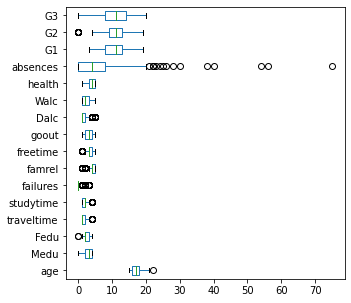

In [ ]:
# check outlier using boxplot
df_2.boxplot(column=numeric_column,fontsize=10,rot=0,grid=False,figsize=(5,5),vert=False)

In [ ]:
# get IQR for each numeric column
Q1 = df_2[numeric_column].quantile(0.25)
Q3 = df_2[numeric_column].quantile(0.75)
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 age           16.0
Medu           2.0
Fedu           2.0
traveltime     1.0
studytime      1.0
failures       0.0
famrel         4.0
freetime       3.0
goout          2.0
Dalc           1.0
Walc           1.0
health         3.0
absences       0.0
G1             8.0
G2             9.0
G3             8.0
Name: 0.25, dtype: float64

Q3:
 age           18.0
Medu           4.0
Fedu           3.0
traveltime     2.0
studytime      2.0
failures       0.0
famrel         5.0
freetime       4.0
goout          4.0
Dalc           2.0
Walc           3.0
health         5.0
absences       8.0
G1            13.0
G2            13.0
G3            14.0
Name: 0.75, dtype: float64

IQR:
 age           2.0
Medu          2.0
Fedu          1.0
traveltime    1.0
studytime     1.0
failures      0.0
famrel        1.0
freetime      1.0
goout         2.0
Dalc          1.0
Walc          2.0
health        2.0
absences      8.0
G1            5.0
G2            4.0
G3            6.0
dtype: float64

Min:
 age       

In [ ]:
# remove outlier
remove_outlier_df = df_2.copy()
for x in numeric_column:
  filter_min = remove_outlier_df[x]<boxplot_min[x]
  filter_max = remove_outlier_df[x]>boxplot_max[x]
  remove_outlier_df = remove_outlier_df[~(
    filter_min|filter_max
    )]

remove_outlier_df.head(5)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
1,15,4,4,1,2,0,4,3,3,1,1,5,2,19,18,18,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,1,1,0
2,18,4,4,2,3,0,5,4,4,1,1,1,0,19,18,19,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1,1,0
4,15,4,2,1,1,0,3,5,2,1,1,3,10,18,19,19,0,1,1,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0
5,16,4,4,1,1,0,3,5,5,2,5,4,8,18,18,18,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,1,1,1,0
6,15,4,4,1,1,0,5,5,3,1,1,4,6,18,19,19,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,1,1,0


In [ ]:
X2 = remove_outlier_df.drop(['G3'], axis=1)
y2 = remove_outlier_df['G3']

In [ ]:
# split the data into train and test by 80:20
X_train, X_test, y_train, y_test = model_selection.train_test_split(X2, y2, train_size=0.8, random_state=0)

In [ ]:
# check the shape data
print('Shape Data X Train:')
print(X_train.shape)
print('\nShape Data X Test:')
print(X_test.shape)
print('\nShape Data y Train:')
print(y_train.shape)
print('\nShape Data y Test:')
print(y_test.shape)

Shape Data X Train:
(185, 41)

Shape Data X Test:
(47, 41)

Shape Data y Train:
(185,)

Shape Data y Test:
(47,)


In [ ]:
# load LinearRegression algorithm
regression_model = linear_model.LinearRegression()

# train the data
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# model result
print('Coefficients:\n',regression_model.coef_)
# print('\n')
print('Intercept:',regression_model.intercept_)

Coefficients:
 [-2.54941085e-01  7.17780807e-02 -1.82263816e-01  4.16455600e-01
  1.33005537e-01  1.25177646e-14  3.27267340e-01  8.16781784e-02
  3.99564791e-02 -3.94234676e-01  1.15738440e-01  7.09527015e-02
  6.76792341e-02  1.54739515e-01  8.88309165e-01  4.44616752e-02
  2.31727749e-01  6.40721850e-02 -2.89289785e-01 -1.39360132e+00
  9.13441876e-01  2.30777411e-01  2.69701973e-01  7.45064574e-01
 -4.56228475e-01 -9.11538740e-01 -9.23471745e-01 -1.45542572e+00
 -5.27054426e-01  7.96902987e-01  1.82253211e-01 -5.96454170e-01
 -2.17934103e+00  2.37857721e-01 -1.55175951e-01 -5.23368206e-02
 -3.98547590e-01 -5.38226239e-01  9.51214737e-01 -4.96406307e-01
 -3.78713641e-01]
Intercept: 3.762629980328432


In [ ]:
# predict the X using trained model
y_train_pred = regression_model.predict(X_train)
y_test_pred = regression_model.predict(X_test)

In [ ]:
# RMSE, MSE and R^2
print("RMSE_train :", mean_squared_error(y_true=y_train,y_pred=y_train_pred,squared=False))
print("RMSE_test :", mean_squared_error(y_true=y_test,y_pred=y_test_pred,squared=False))
print("MSE :", metrics.mean_squared_error(y_test,y_test_pred))
print("R squared :", metrics.r2_score(y_test,y_test_pred))

RMSE_train : 1.1510848154924092
RMSE_test : 1.7910750837442582
MSE : 3.207949955609501
R squared : 0.7682074626474752


In [ ]:
# VIF model
1/(1-metrics.r2_score(y_test,y_test_pred))

4.314202741044836

In [ ]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X2.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X2.values, i)
                          for i in range(len(X2.columns))]
  
print(vif_data)

              feature         VIF
0                 age  136.200703
1                Medu   26.253398
2                Fedu   15.537825
3          traveltime    8.650777
4           studytime   12.903622
5            failures         NaN
6              famrel   46.784059
7            freetime   19.481924
8               goout   13.225086
9                Dalc   11.498063
10               Walc    9.081207
11             health    8.680854
12           absences    2.787429
13                 G1  115.800232
14                 G2  117.375116
15          school_MS    1.797314
16              sex_M    2.789675
17          address_U    7.870740
18        famsize_LE3    1.607711
19          Pstatus_T   12.788307
20        Mjob_health    2.996709
21         Mjob_other    4.882297
22      Mjob_services    4.193092
23       Mjob_teacher    5.280797
24        Fjob_health    2.188191
25         Fjob_other   14.492792
26      Fjob_services    6.723227
27       Fjob_teacher    3.009270
28        reas

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [ ]:
# standarization
scaler = preprocessing.StandardScaler().fit(remove_outlier_df.drop(['G3'], axis=1))
X2 = scaler.transform(remove_outlier_df.drop(['G3'], axis=1))
X2 = pd.DataFrame(X2, index=remove_outlier_df.drop(['G3'], axis=1).index,columns=remove_outlier_df.drop(['G3'], axis=1).columns)
X2.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
1,-1.331830,1.047883,1.240231,-0.593130,0.062721,0.0,-0.167605,-0.355756,0.016814,-0.500192,-0.977698,1.038846,-0.463214,2.382367,2.028927,-0.355266,1.062281,0.483779,-0.610558,0.323669,-0.315478,-0.725476,1.837759,-0.490552,-0.212238,-1.159066,-0.590624,3.556270,-0.590624,-0.315478,-0.590624,-1.655879,-0.176383,-0.370479,0.760415,-0.991416,0.941371,0.483779,0.148413,0.414388,-0.637229
2,1.370659,1.047883,1.240231,1.126947,1.517846,0.0,1.272556,0.823322,0.992052,-0.500192,-0.977698,-1.771792,-0.915701,2.382367,2.028927,2.814796,-0.941371,-2.067058,1.637846,0.323669,-0.315478,1.378405,-0.544141,-0.490552,-0.212238,0.862764,-0.590624,-0.281193,-0.590624,-0.315478,1.693123,0.603909,-0.176383,-0.370479,-1.315071,-0.991416,-1.062281,0.483779,0.148413,0.414388,-0.637229
4,-1.331830,1.047883,-0.659001,-0.593130,-1.392404,0.0,-1.607766,2.002401,-0.958423,-0.500192,-0.977698,-0.366473,1.346734,2.059900,2.351996,-0.355266,1.062281,0.483779,1.637846,0.323669,-0.315478,-0.725476,-0.544141,2.038518,-0.212238,0.862764,-0.590624,-0.281193,-0.590624,-0.315478,-0.590624,0.603909,-0.176383,-0.370479,-1.315071,-0.991416,-1.062281,0.483779,0.148413,0.414388,-0.637229
5,-0.431001,1.047883,1.240231,-0.593130,-1.392404,0.0,-1.607766,2.002401,1.967290,1.285110,2.566456,0.336186,0.894247,2.059900,2.028927,-0.355266,1.062281,-2.067058,-0.610558,0.323669,-0.315478,-0.725476,-0.544141,2.038518,-0.212238,-1.159066,-0.590624,3.556270,-0.590624,-0.315478,-0.590624,0.603909,-0.176383,-0.370479,-1.315071,1.008658,0.941371,0.483779,0.148413,0.414388,-0.637229
6,-1.331830,1.047883,1.240231,-0.593130,-1.392404,0.0,1.272556,2.002401,0.016814,-0.500192,-0.977698,0.336186,0.441760,2.059900,2.351996,-0.355266,1.062281,0.483779,1.637846,-3.089572,-0.315478,-0.725476,-0.544141,2.038518,-0.212238,-1.159066,-0.590624,3.556270,-0.590624,-0.315478,-0.590624,0.603909,-0.176383,-0.370479,-1.315071,-0.991416,0.941371,0.483779,0.148413,0.414388,-0.637229


In [ ]:
y2 = remove_outlier_df['G3']

# split the data into train and test by 80:20
X_train, X_test, y_train, y_test = model_selection.train_test_split(X2, y2, train_size=0.8, random_state=0)

In [ ]:
# load RidgeRegression algorithm
regression_model_ridge = linear_model.Ridge(alpha=1.0,solver='auto')

In [ ]:
# train the data
regression_model_ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
# model result
print('Coefficients:\n',regression_model_ridge.coef_)
# print('\n')
print('Intercept:',regression_model_ridge.intercept_)

Coefficients:
 [-0.28158023  0.08530497 -0.18621773  0.23628153  0.0890024   0.
  0.21877281  0.07275686  0.03292933 -0.20749356  0.11776943  0.10272452
  0.28523112  0.56655325  2.64810089  0.0123984   0.10994631  0.02860411
 -0.12169039 -0.40316443  0.24845964  0.10310206  0.10125034  0.27077541
 -0.08025246 -0.4028078  -0.36578314 -0.35325845 -0.23504379  0.23220566
  0.0757753  -0.26306401 -0.36357082  0.07627563 -0.06859773 -0.02465138
 -0.19352342 -0.2079037   0.15282118 -0.16451002 -0.17863868]
Intercept: 11.747190609493856


In [ ]:
# predict the X using trained model
y_train_pred_ridge = regression_model_ridge.predict(X_train)
y_test_pred_ridge = regression_model_ridge.predict(X_test)

In [ ]:
# RMSE, MSE and R^2
print("RMSE_train :", mean_squared_error(y_true=y_train,y_pred=y_train_pred_ridge,squared=False))
print("RMSE_test :", mean_squared_error(y_true=y_test,y_pred=y_test_pred_ridge,squared=False))
print("MSE :", metrics.mean_squared_error(y_test,y_test_pred_ridge))
print("R squared :", metrics.r2_score(y_test,y_test_pred_ridge))

RMSE_train : 1.1517737107921193
RMSE_test : 1.7842917344656617
MSE : 3.1836969936824797
R squared : 0.7699598763887021


In [ ]:
# VIF model
1/(1-metrics.r2_score(y_test,y_test_pred_ridge))

4.347067738885911

In [ ]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X2.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X2.values, i)
                          for i in range(len(X2.columns))]
  
print(vif_data)

              feature       VIF
0                 age  1.748313
1                Medu  3.305831
2                Fedu  2.080282
3          traveltime  1.369181
4           studytime  1.423223
5            failures       NaN
6              famrel  1.298877
7            freetime  1.264894
8               goout  1.413837
9                Dalc  1.863248
10               Walc  2.030009
11             health  1.226017
12           absences  1.517485
13                 G1  7.709577
14                 G2  7.763597
15          school_MS  1.642373
16              sex_M  1.482829
17          address_U  1.536977
18        famsize_LE3  1.172966
19          Pstatus_T  1.259704
20        Mjob_health  2.729521
21         Mjob_other  3.200243
22      Mjob_services  3.260787
23       Mjob_teacher  4.270473
24        Fjob_health  2.213920
25         Fjob_other  6.672652
26      Fjob_services  5.428684
27       Fjob_teacher  2.896539
28        reason_home  1.479984
29       reason_other  1.345346
30  reas

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [ ]:
# load LassoRegression algorithm
regression_model_lasso = linear_model.Lasso(alpha=1.0)

In [ ]:
# train the data
regression_model_lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
# model result
print('Coefficients:\n',regression_model_lasso.coef_)
# print('\n')
print('Intercept:',regression_model_lasso.intercept_)

Coefficients:
 [-0.          0.          0.         -0.          0.          0.
  0.          0.         -0.         -0.         -0.          0.
  0.          0.          2.18550121 -0.          0.          0.
  0.         -0.          0.         -0.          0.         -0.
  0.          0.         -0.          0.         -0.          0.
  0.         -0.         -0.         -0.         -0.         -0.
  0.          0.          0.          0.         -0.        ]
Intercept: 11.839084398729408


In [ ]:
# predict the X using trained model
y_train_pred_lasso = regression_model_lasso.predict(X_train)
y_test_pred_lasso = regression_model_lasso.predict(X_test)

In [ ]:
# RMSE, MSE and R^2
print("RMSE_train :", mean_squared_error(y_true=y_train,y_pred=y_train_pred_lasso,squared=False))
print("RMSE_test :", mean_squared_error(y_true=y_test,y_pred=y_test_pred_lasso,squared=False))
print("MSE :", metrics.mean_squared_error(y_test,y_test_pred_lasso))
print("R squared :", metrics.r2_score(y_test,y_test_pred_lasso))

RMSE_train : 1.7339779254400483
RMSE_test : 1.969373681665701
MSE : 3.878432698037518
R squared : 0.7197612903975901


In [ ]:
# VIF model
1/(1-metrics.r2_score(y_test,y_test_pred_lasso))

3.5683863996474825

# EXPERIMENT 3

In [ ]:
df_3 = df_1.copy()
df_3.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,16,4,3,1,4,0,4,2,2,1,1,2,4,19,19,20,0,1,1,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,1,1,0
1,15,4,4,1,2,0,4,3,3,1,1,5,2,19,18,18,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,1,1,0
2,18,4,4,2,3,0,5,4,4,1,1,1,0,19,18,19,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1,1,0
3,17,4,4,2,1,1,4,2,4,2,3,2,24,18,18,18,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,1,1,0
4,15,4,2,1,1,0,3,5,2,1,1,3,10,18,19,19,0,1,1,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0


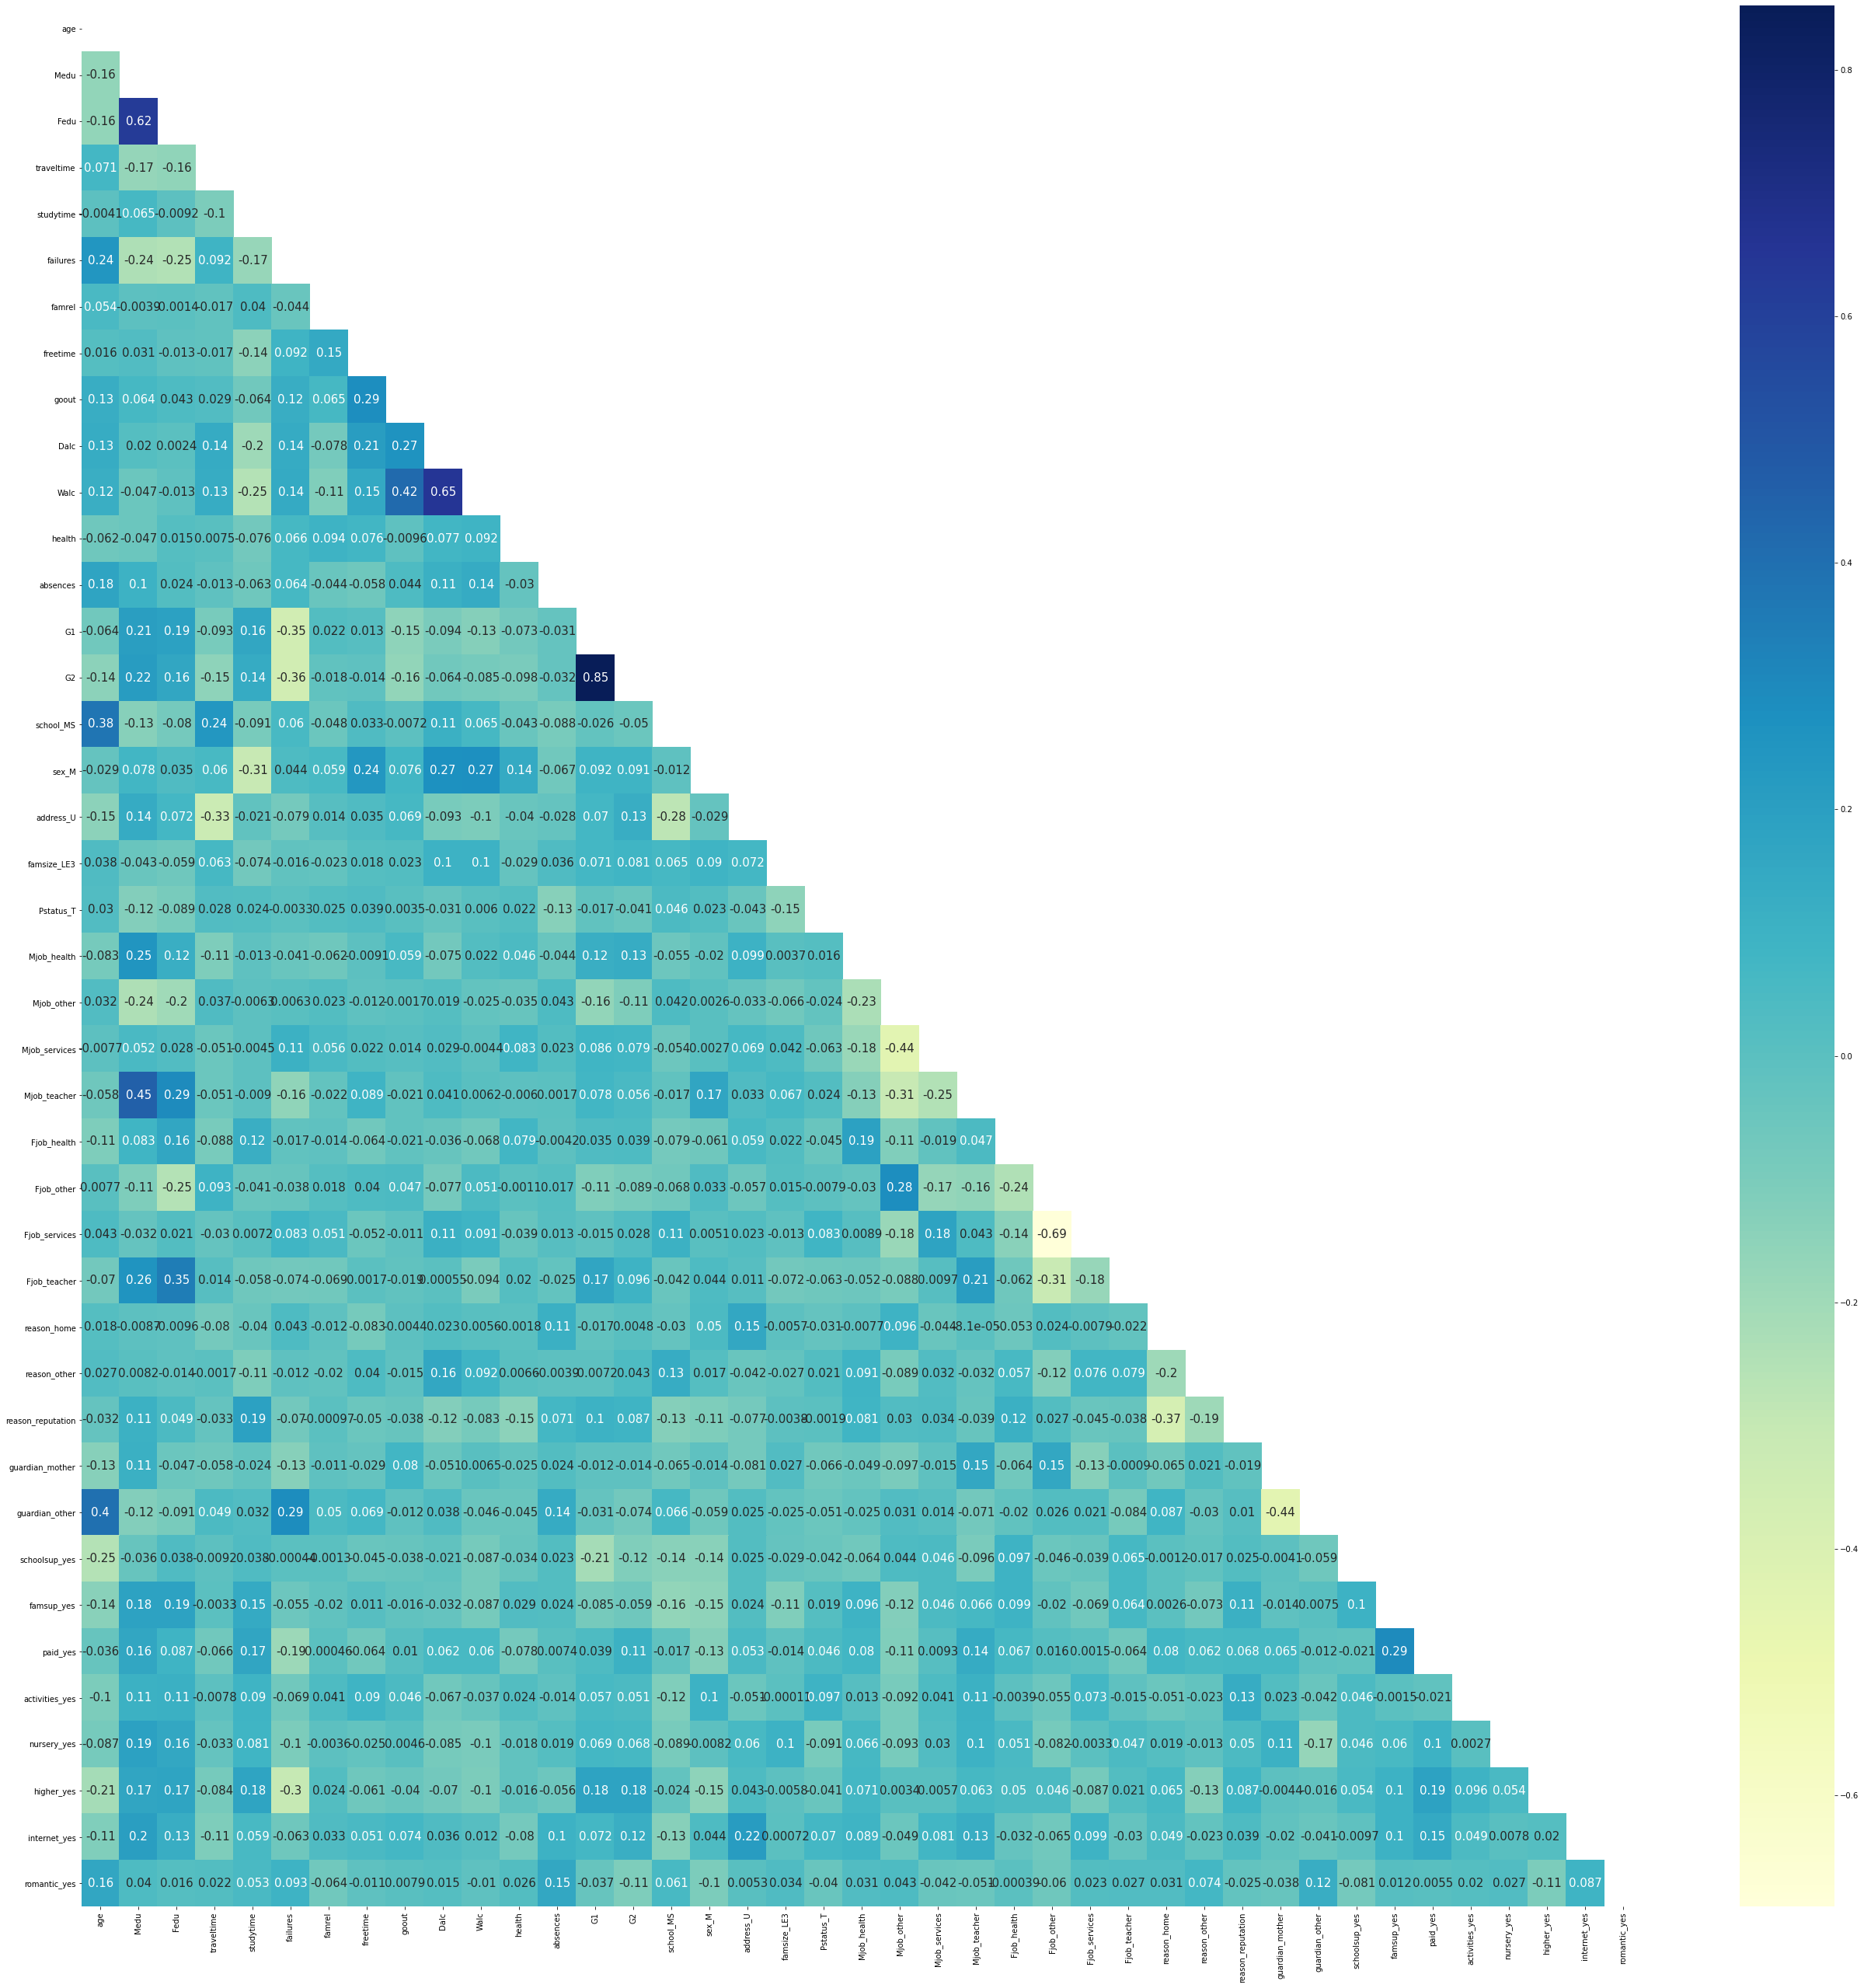

In [ ]:
# check correlation between feature column

correlation_between_column = df_3.drop(['G3'], axis=1).corr()
upper_triangle_corr = np.triu(correlation_between_column)

fig, ax = plt.subplots(figsize=(45,45))
sns.heatmap(correlation_between_column, annot = True, cmap="YlGnBu",ax=ax,annot_kws={"size":15},mask=upper_triangle_corr)

In [ ]:
df_3.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,16,4,3,1,4,0,4,2,2,1,1,2,4,19,19,20,0,1,1,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,1,1,0
1,15,4,4,1,2,0,4,3,3,1,1,5,2,19,18,18,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,1,1,0
2,18,4,4,2,3,0,5,4,4,1,1,1,0,19,18,19,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1,1,0
3,17,4,4,2,1,1,4,2,4,2,3,2,24,18,18,18,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,1,1,0
4,15,4,2,1,1,0,3,5,2,1,1,3,10,18,19,19,0,1,1,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0


In [ ]:
# removes features that have high correlation
df_3 = df_3.drop(['G1','Fjob_services'], axis=1)
df_3.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G2,G3,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,16,4,3,1,4,0,4,2,2,1,1,2,4,19,20,0,1,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,1,0
1,15,4,4,1,2,0,4,3,3,1,1,5,2,18,18,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,1,1,1,0
2,18,4,4,2,3,0,5,4,4,1,1,1,0,18,19,1,0,0,1,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,1,0
3,17,4,4,2,1,1,4,2,4,2,3,2,24,18,18,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,1,1,0
4,15,4,2,1,1,0,3,5,2,1,1,3,10,19,19,0,1,1,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,1,0


In [ ]:
X3 = df_3.drop(['G3'], axis=1)
y3 = df_3['G3']

In [ ]:
# split the data into train and test by 80:20
X_train, X_test, y_train, y_test = model_selection.train_test_split(X3, y3, train_size=0.8, random_state=0)

In [ ]:
# check the shape data
print('Shape Data X Train:')
print(X_train.shape)
print('\nShape Data X Test:')
print(X_test.shape)
print('\nShape Data y Train:')
print(y_train.shape)
print('\nShape Data y Test:')
print(y_test.shape)

Shape Data X Train:
(316, 39)

Shape Data X Test:
(79, 39)

Shape Data y Train:
(316,)

Shape Data y Test:
(79,)


In [ ]:
# load LinearRegression algorithm
regression_model = linear_model.LinearRegression()

# train the data
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# model result
print('Coefficients:\n',regression_model.coef_)
# print('\n')
print('Intercept:',regression_model.intercept_)

Coefficients:
 [-0.1503236   0.09495781 -0.07633734  0.04152106 -0.04691314 -0.37044155
  0.42291075  0.04284686  0.07266098 -0.0602132   0.09247121  0.05090765
  0.04399703  1.09545327  0.34030924  0.04821044 -0.12559635  0.27797914
 -0.04777032  0.01539891  0.11186128  0.26496884 -0.08584873  0.71835575
  0.25198732  0.6663939  -0.13131418  0.10350499 -0.00405239  0.32221096
  0.6974058   0.20681113  0.03504699 -0.05414357 -0.14969023 -0.40227063
  0.44954851 -0.44729717 -0.12844468]
Intercept: -1.479943244550146


In [ ]:
# predict the X using trained model
y_train_pred = regression_model.predict(X_train)
y_test_pred = regression_model.predict(X_test)

In [ ]:
# RMSE, MSE and R^2
print("RMSE_train :", mean_squared_error(y_true=y_train,y_pred=y_train_pred,squared=False))
print("RMSE_test :", mean_squared_error(y_true=y_test,y_pred=y_test_pred,squared=False))
print("MSE :", metrics.mean_squared_error(y_test,y_test_pred))
print("R squared :", metrics.r2_score(y_test,y_test_pred))

RMSE_train : 1.829634800271109
RMSE_test : 1.9420255795261707
MSE : 3.7714633515339595
R squared : 0.7966751081776422


In [ ]:
# VIF model
1/(1-metrics.r2_score(y_test,y_test_pred))

4.918236970580495

In [ ]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X3.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X3.values, i)
                          for i in range(len(X3.columns))]
  
print(vif_data)

              feature        VIF
0                 age  90.359429
1                Medu  21.402420
2                Fedu  13.380820
3          traveltime   6.461984
4           studytime   9.481873
5            failures   1.820701
6              famrel  22.716789
7            freetime  14.524758
8               goout  13.113254
9                Dalc   7.628314
10               Walc   9.764417
11             health   8.639023
12           absences   1.870000
13                 G2  12.407244
14          school_MS   1.614839
15              sex_M   2.809003
16          address_U   6.012847
17        famsize_LE3   1.612744
18          Pstatus_T  10.771227
19        Mjob_health   2.476285
20         Mjob_other   4.173025
21      Mjob_services   3.810237
22       Mjob_teacher   3.651684
23        Fjob_health   1.317425
24         Fjob_other   3.384535
25       Fjob_teacher   1.534482
26        reason_home   1.974347
27       reason_other   1.412286
28  reason_reputation   2.071209
29    guar

In [ ]:
# standarization
scaler = preprocessing.StandardScaler().fit(df_3.drop(['G3'], axis=1))
X3 = scaler.transform(df_3.drop(['G3'], axis=1))
X3 = pd.DataFrame(X3, index=df_3.drop(['G3'], axis=1).index,columns=df_3.drop(['G3'], axis=1).columns)
X3.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G2,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,-0.546287,1.143856,0.440257,-0.643249,2.343844,-0.449944,0.062194,-1.238419,-0.997295,-0.540699,-1.003789,-1.119469,-0.213796,2.205656,-0.363050,1.054656,0.535392,-0.636941,0.340322,3.258473,-0.745062,-0.593919,-0.414858,-0.218507,-1.104129,-0.281487,-0.617348,-0.316668,1.661898,0.668496,-0.296908,-0.38504,-1.257656,-0.919671,0.982433,0.507899,0.23094,0.447893,-0.70845
1,-1.330954,1.143856,1.360371,-0.643249,-0.042286,-0.449944,0.062194,-0.236010,-0.097908,-0.540699,-1.003789,1.041070,-0.464016,1.939468,-0.363050,1.054656,0.535392,-0.636941,0.340322,-0.306892,-0.745062,1.683731,-0.414858,-0.218507,-1.104129,3.552561,-0.617348,-0.316668,-0.601722,-1.495896,-0.296908,-0.38504,0.795130,-0.919671,0.982433,0.507899,0.23094,0.447893,-0.70845
2,1.023046,1.143856,1.360371,0.792251,1.150779,-0.449944,1.178860,0.766399,0.801479,-0.540699,-1.003789,-1.839649,-0.714236,1.939468,2.754443,-0.948176,-1.867789,1.570004,0.340322,-0.306892,1.342169,-0.593919,-0.414858,-0.218507,0.905691,-0.281487,-0.617348,-0.316668,1.661898,0.668496,-0.296908,-0.38504,-1.257656,-0.919671,-1.017881,0.507899,0.23094,0.447893,-0.70845
3,0.238380,1.143856,1.360371,0.792251,-1.235351,0.896479,0.062194,-1.238419,0.801479,0.583385,0.551100,-1.119469,2.288407,1.939468,-0.363050,-0.948176,0.535392,-0.636941,0.340322,-0.306892,-0.745062,1.683731,-0.414858,-0.218507,-1.104129,3.552561,1.619831,-0.316668,-0.601722,0.668496,-0.296908,-0.38504,0.795130,-0.919671,-1.017881,0.507899,0.23094,0.447893,-0.70845
4,-1.330954,1.143856,-0.479857,-0.643249,-1.235351,-0.449944,-1.054472,1.768808,-0.997295,-0.540699,-1.003789,-0.399289,0.536865,2.205656,-0.363050,1.054656,0.535392,1.570004,0.340322,-0.306892,-0.745062,-0.593919,2.410466,-0.218507,0.905691,-0.281487,-0.617348,-0.316668,-0.601722,0.668496,-0.296908,-0.38504,-1.257656,-0.919671,-1.017881,0.507899,0.23094,0.447893,-0.70845


In [ ]:
y3 = df_3['G3']

# split the data into train and test by 80:20
X_train, X_test, y_train, y_test = model_selection.train_test_split(X3, y3, train_size=0.8, random_state=0)

In [ ]:
# load RidgeRegression algorithm
regression_model_ridge = linear_model.Ridge(alpha=1.0,solver='auto')

In [ ]:
# train the data
regression_model_ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
# model result
print('Coefficients:\n',regression_model_ridge.coef_)
# print('\n')
print('Intercept:',regression_model_ridge.intercept_)

Coefficients:
 [-1.89568463e-01  1.05297390e-01 -8.09861577e-02  2.83253358e-02
 -3.69926726e-02 -2.79544039e-01  3.76742317e-01  4.37382933e-02
  7.76923132e-02 -5.26468141e-02  1.18219502e-01  6.89129283e-02
  3.50593117e-01  4.09735915e+00  1.07154627e-01  2.62974865e-02
 -5.15167725e-02  1.26592615e-01 -1.51439960e-02  5.08756934e-03
  5.17770095e-02  1.16392004e-01 -3.26091104e-02  1.48956751e-01
  1.23383192e-01  1.71811135e-01 -5.71607388e-02  3.14971445e-02
  3.10395639e-04  1.47845563e-01  1.89354223e-01  6.77882729e-02
  1.57323773e-02 -2.67836399e-02 -7.55449002e-02 -1.62288465e-01
  9.95711832e-02 -1.65503977e-01 -6.22852504e-02]
Intercept: 10.453406457095262


In [ ]:
# predict the X using trained model
y_train_pred_ridge = regression_model_ridge.predict(X_train)
y_test_pred_ridge = regression_model_ridge.predict(X_test)

In [ ]:
# RMSE, MSE and R^2
print("RMSE_train :", mean_squared_error(y_true=y_train,y_pred=y_train_pred_ridge,squared=False))
print("RMSE_test :", mean_squared_error(y_true=y_test,y_pred=y_test_pred_ridge,squared=False))
print("MSE :", metrics.mean_squared_error(y_test,y_test_pred_ridge))
print("R squared :", metrics.r2_score(y_test,y_test_pred_ridge))

RMSE_train : 1.8297003449383142
RMSE_test : 1.9403579872959098
MSE : 3.7649891188630344
R squared : 0.7970241431634688


In [ ]:
# VIF model
1/(1-metrics.r2_score(y_test,y_test_pred_ridge))

4.926694315203019

In [ ]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X3.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X3.values, i)
                          for i in range(len(X3.columns))]
  
print(vif_data)

              feature       VIF
0                 age  1.783790
1                Medu  2.931183
2                Fedu  2.127847
3          traveltime  1.303664
4           studytime  1.381124
5            failures  1.534813
6              famrel  1.123383
7            freetime  1.292424
8               goout  1.496164
9                Dalc  2.027402
10               Walc  2.347724
11             health  1.176522
12           absences  1.252201
13                 G2  1.416329
14          school_MS  1.509589
15              sex_M  1.480925
16          address_U  1.385217
17        famsize_LE3  1.147481
18          Pstatus_T  1.138153
19        Mjob_health  2.263257
20         Mjob_other  2.695637
21      Mjob_services  2.816832
22       Mjob_teacher  3.117216
23        Fjob_health  1.260245
24         Fjob_other  1.527113
25       Fjob_teacher  1.423090
26        reason_home  1.433085
27       reason_other  1.296831
28  reason_reputation  1.521900
29    guardian_mother  1.487394
30     g

In [ ]:
# load LassoRegression algorithm
regression_model_lasso = linear_model.Lasso(alpha=1.0)

In [ ]:
# train the data
regression_model_lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
# model result
print('Coefficients:\n',regression_model_lasso.coef_)
# print('\n')
print('Intercept:',regression_model_lasso.intercept_)

Coefficients:
 [-0.          0.          0.         -0.          0.         -0.
  0.          0.         -0.         -0.         -0.          0.
  0.          3.18831053 -0.          0.          0.          0.
 -0.          0.         -0.          0.          0.          0.
  0.          0.         -0.          0.          0.          0.
 -0.          0.         -0.          0.         -0.         -0.
  0.         -0.         -0.        ]
Intercept: 10.396993827105007


In [ ]:
# predict the X using trained model
y_train_pred_lasso = regression_model_lasso.predict(X_train)
y_test_pred_lasso = regression_model_lasso.predict(X_test)

In [ ]:
# RMSE, MSE and R^2
print("RMSE_train :", mean_squared_error(y_true=y_train,y_pred=y_train_pred_lasso,squared=False))
print("RMSE_test :", mean_squared_error(y_true=y_test,y_pred=y_test_pred_lasso,squared=False))
print("MSE :", metrics.mean_squared_error(y_test,y_test_pred_lasso))
print("R squared :", metrics.r2_score(y_test,y_test_pred_lasso))

RMSE_train : 2.2120323144664393
RMSE_test : 1.9827023157965433
MSE : 3.931108473064976
R squared : 0.7880684152206341


In [ ]:
# VIF model
1/(1-metrics.r2_score(y_test,y_test_pred_lasso))

4.718503856048936

# EXPERIMENT 4

In [ ]:
df_4 = remove_outlier_df
df_4.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
1,15,4,4,1,2,0,4,3,3,1,1,5,2,19,18,18,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,1,1,0
2,18,4,4,2,3,0,5,4,4,1,1,1,0,19,18,19,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1,1,0
4,15,4,2,1,1,0,3,5,2,1,1,3,10,18,19,19,0,1,1,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0
5,16,4,4,1,1,0,3,5,5,2,5,4,8,18,18,18,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,1,1,1,0
6,15,4,4,1,1,0,5,5,3,1,1,4,6,18,19,19,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,1,1,0


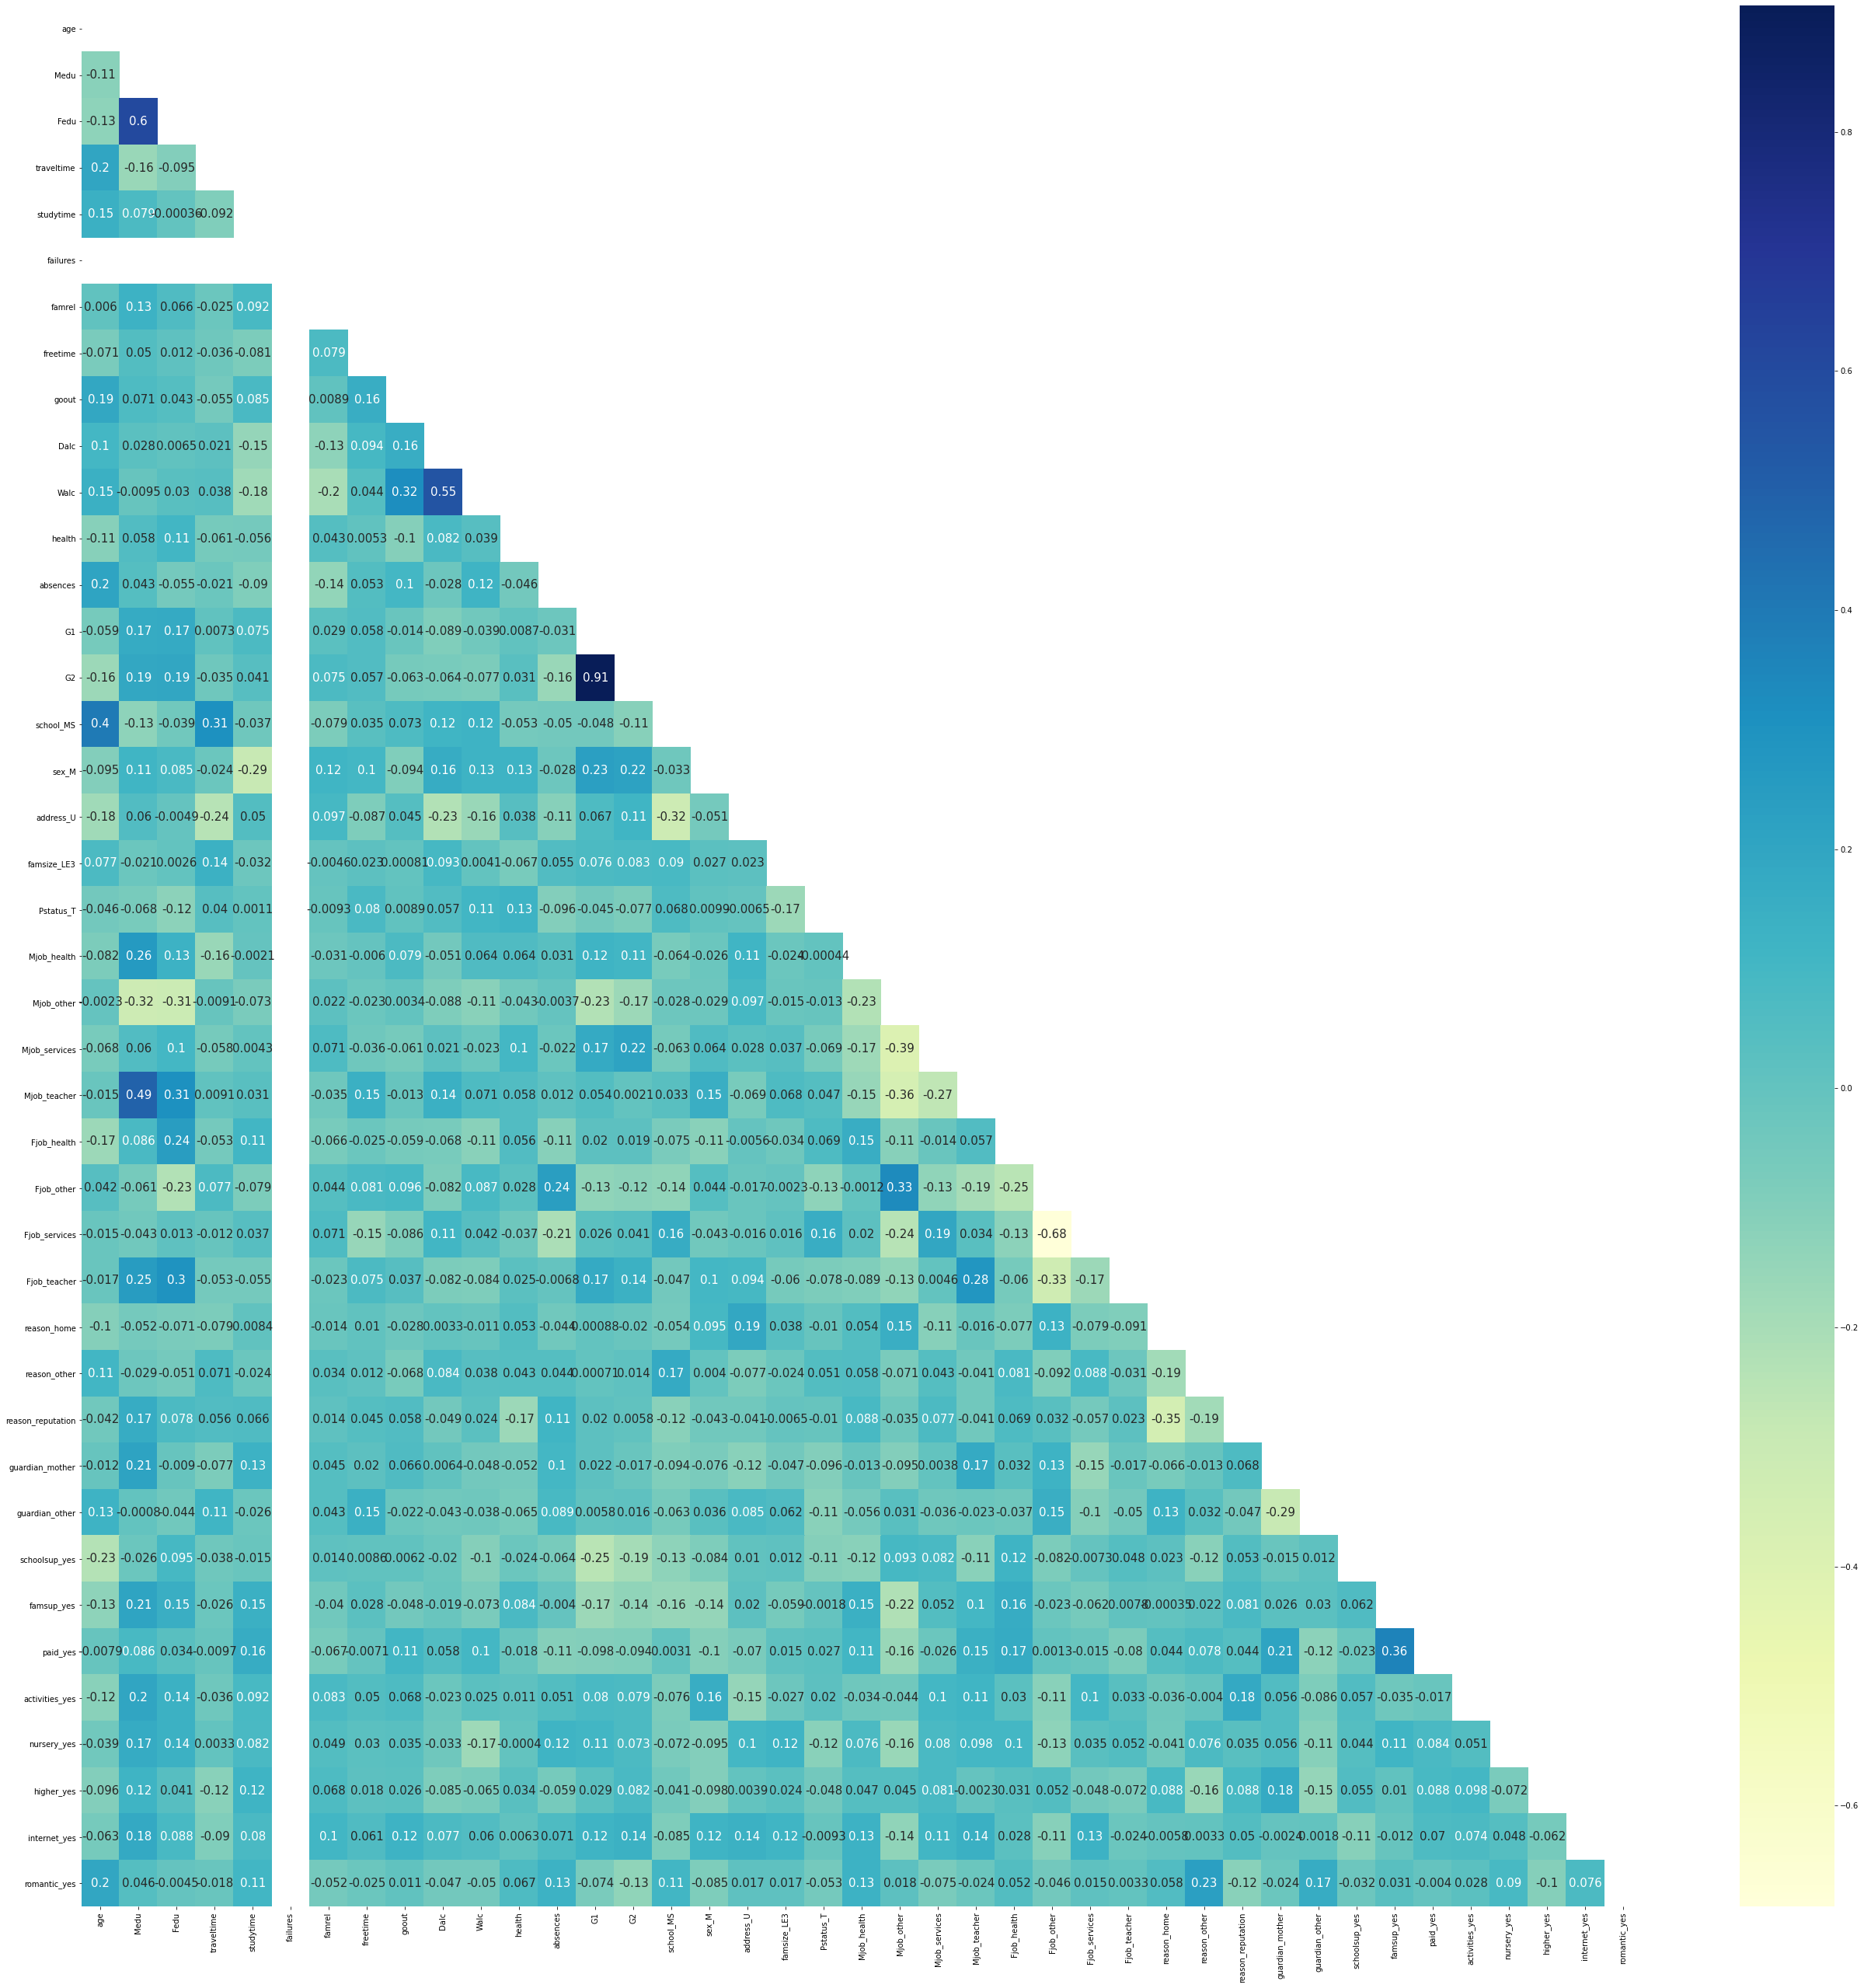

In [ ]:
# check correlation between feature column

correlation_between_column = df_4.drop(['G3'], axis=1).corr()
upper_triangle_corr = np.triu(correlation_between_column)

fig, ax = plt.subplots(figsize=(45,45))
sns.heatmap(correlation_between_column, annot = True, cmap="YlGnBu",ax=ax,annot_kws={"size":15},mask=upper_triangle_corr)

In [ ]:
df_4.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
1,15,4,4,1,2,0,4,3,3,1,1,5,2,19,18,18,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,1,1,0
2,18,4,4,2,3,0,5,4,4,1,1,1,0,19,18,19,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1,1,0
4,15,4,2,1,1,0,3,5,2,1,1,3,10,18,19,19,0,1,1,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0
5,16,4,4,1,1,0,3,5,5,2,5,4,8,18,18,18,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,1,1,1,0
6,15,4,4,1,1,0,5,5,3,1,1,4,6,18,19,19,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,1,1,0


In [ ]:
df_4 = df_4.drop(['G1','Fjob_services','failures'], axis=1)
df_4.head()

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,absences,G2,G3,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
1,15,4,4,1,2,4,3,3,1,1,5,2,18,18,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,1,1,1,0
2,18,4,4,2,3,5,4,4,1,1,1,0,18,19,1,0,0,1,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,1,0
4,15,4,2,1,1,3,5,2,1,1,3,10,19,19,0,1,1,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,1,0
5,16,4,4,1,1,3,5,5,2,5,4,8,18,18,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,1,1,1,0
6,15,4,4,1,1,5,5,3,1,1,4,6,19,19,0,1,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,1,1,0


In [ ]:
X4 = df_4.drop(['G3'], axis=1)
y4 = df_4['G3']

In [ ]:
# split the data into train and test by 80:20
X_train, X_test, y_train, y_test = model_selection.train_test_split(X4, y4, train_size=0.8, random_state=0)

In [ ]:
# check the shape data
print('Shape Data X Train:')
print(X_train.shape)
print('\nShape Data X Test:')
print(X_test.shape)
print('\nShape Data y Train:')
print(y_train.shape)
print('\nShape Data y Test:')
print(y_test.shape)

Shape Data X Train:
(185, 38)

Shape Data X Test:
(47, 38)

Shape Data y Train:
(185,)

Shape Data y Test:
(47,)


In [ ]:
# load LinearRegression algorithm
regression_model = linear_model.LinearRegression()

# train the data
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# model result
print('Coefficients:\n',regression_model.coef_)
# print('\n')
print('Intercept:',regression_model.intercept_)

Coefficients:
 [-0.208181    0.04054652 -0.15906952  0.41338082  0.20363785  0.25671492
  0.08469292  0.05411345 -0.32227987  0.10116159  0.06248909  0.0826088
  1.03602363  0.12310732  0.34126912  0.11236603 -0.2904623  -1.33582806
  0.79017235  0.06828348  0.07919663  0.58097785  0.40374319 -0.16541114
 -0.59297456 -0.43710246  0.73383933  0.21122005 -0.47939617 -2.25898568
  0.14500511 -0.22039364 -0.06039027 -0.37991004 -0.46247299  0.89242247
 -0.54866217 -0.3663826 ]
Intercept: 2.2886603607826483


In [ ]:
# predict the X using trained model
y_train_pred = regression_model.predict(X_train)
y_test_pred = regression_model.predict(X_test)

In [ ]:
# RMSE, MSE and R^2
print("RMSE_train :", mean_squared_error(y_true=y_train,y_pred=y_train_pred,squared=False))
print("RMSE_test :", mean_squared_error(y_true=y_test,y_pred=y_test_pred,squared=False))
print("MSE :", metrics.mean_squared_error(y_test,y_test_pred))
print("R squared :", metrics.r2_score(y_test,y_test_pred))

RMSE_train : 1.1738348160173127
RMSE_test : 1.730285547132921
MSE : 2.9938880746170717
R squared : 0.7836746448767136


In [ ]:
# VIF model
1/(1-metrics.r2_score(y_test,y_test_pred))

4.622666628375985

In [ ]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X4.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X4.values, i)
                          for i in range(len(X4.columns))]
  
print(vif_data)

              feature         VIF
0                 age  129.989079
1                Medu   26.158566
2                Fedu   15.500761
3          traveltime    8.518413
4           studytime   12.643935
5              famrel   44.420096
6            freetime   19.379733
7               goout   13.146591
8                Dalc   11.146706
9                Walc    8.852676
10             health    8.678649
11           absences    2.638783
12                 G2   21.579369
13          school_MS    1.786580
14              sex_M    2.716506
15          address_U    7.860381
16        famsize_LE3    1.600163
17          Pstatus_T   12.641755
18        Mjob_health    2.925547
19         Mjob_other    4.743695
20      Mjob_services    4.015255
21       Mjob_teacher    5.164988
22        Fjob_health    1.404195
23         Fjob_other    4.562504
24       Fjob_teacher    1.661707
25        reason_home    1.951752
26       reason_other    1.471119
27  reason_reputation    2.009311
28    guardian

In [ ]:
# standarization
scaler = preprocessing.StandardScaler().fit(df_4.drop(['G3'], axis=1))
X4 = scaler.transform(df_4.drop(['G3'], axis=1))
X4 = pd.DataFrame(X4, index=df_4.drop(['G3'], axis=1).index,columns=df_4.drop(['G3'], axis=1).columns)
X4.head()

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,absences,G2,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
1,-1.331830,1.047883,1.240231,-0.593130,0.062721,-0.167605,-0.355756,0.016814,-0.500192,-0.977698,1.038846,-0.463214,2.028927,-0.355266,1.062281,0.483779,-0.610558,0.323669,-0.315478,-0.725476,1.837759,-0.490552,-0.212238,-1.159066,3.556270,-0.590624,-0.315478,-0.590624,-1.655879,-0.176383,-0.370479,0.760415,-0.991416,0.941371,0.483779,0.148413,0.414388,-0.637229
2,1.370659,1.047883,1.240231,1.126947,1.517846,1.272556,0.823322,0.992052,-0.500192,-0.977698,-1.771792,-0.915701,2.028927,2.814796,-0.941371,-2.067058,1.637846,0.323669,-0.315478,1.378405,-0.544141,-0.490552,-0.212238,0.862764,-0.281193,-0.590624,-0.315478,1.693123,0.603909,-0.176383,-0.370479,-1.315071,-0.991416,-1.062281,0.483779,0.148413,0.414388,-0.637229
4,-1.331830,1.047883,-0.659001,-0.593130,-1.392404,-1.607766,2.002401,-0.958423,-0.500192,-0.977698,-0.366473,1.346734,2.351996,-0.355266,1.062281,0.483779,1.637846,0.323669,-0.315478,-0.725476,-0.544141,2.038518,-0.212238,0.862764,-0.281193,-0.590624,-0.315478,-0.590624,0.603909,-0.176383,-0.370479,-1.315071,-0.991416,-1.062281,0.483779,0.148413,0.414388,-0.637229
5,-0.431001,1.047883,1.240231,-0.593130,-1.392404,-1.607766,2.002401,1.967290,1.285110,2.566456,0.336186,0.894247,2.028927,-0.355266,1.062281,-2.067058,-0.610558,0.323669,-0.315478,-0.725476,-0.544141,2.038518,-0.212238,-1.159066,3.556270,-0.590624,-0.315478,-0.590624,0.603909,-0.176383,-0.370479,-1.315071,1.008658,0.941371,0.483779,0.148413,0.414388,-0.637229
6,-1.331830,1.047883,1.240231,-0.593130,-1.392404,1.272556,2.002401,0.016814,-0.500192,-0.977698,0.336186,0.441760,2.351996,-0.355266,1.062281,0.483779,1.637846,-3.089572,-0.315478,-0.725476,-0.544141,2.038518,-0.212238,-1.159066,3.556270,-0.590624,-0.315478,-0.590624,0.603909,-0.176383,-0.370479,-1.315071,-0.991416,0.941371,0.483779,0.148413,0.414388,-0.637229


In [ ]:
y4 = df_4['G3']

# split the data into train and test by 80:20
X_train, X_test, y_train, y_test = model_selection.train_test_split(X4, y4, train_size=0.8, random_state=0)

In [ ]:
# load RidgeRegression algorithm
regression_model_ridge = linear_model.Ridge(alpha=1.0,solver='auto')

In [ ]:
# train the data
regression_model_ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
# model result
print('Coefficients:\n',regression_model_ridge.coef_)
# print('\n')
print('Intercept:',regression_model_ridge.intercept_)

Coefficients:
 [-0.23043345  0.04649984 -0.16180976  0.23672496  0.14094382  0.17299966
  0.07398993  0.05075667 -0.18060157  0.11171385  0.08717952  0.35775982
  3.17828225  0.03601403  0.17262478  0.04380309 -0.1250013  -0.38604564
  0.22388908  0.02712217  0.03453993  0.2183483   0.08109925 -0.07884798
 -0.14899901 -0.19073409  0.21112557  0.08980598 -0.20870895 -0.37973155
  0.04011377 -0.10776407 -0.03135466 -0.18610113 -0.17597119  0.13308944
 -0.18847899 -0.17017387]
Intercept: 11.738497820947172


In [ ]:
# predict the X using trained model
y_train_pred_ridge = regression_model_ridge.predict(X_train)
y_test_pred_ridge = regression_model_ridge.predict(X_test)

In [ ]:
# RMSE, MSE and R^2
print("RMSE_train :", mean_squared_error(y_true=y_train,y_pred=y_train_pred_ridge,squared=False))
print("RMSE_test :", mean_squared_error(y_true=y_test,y_pred=y_test_pred_ridge,squared=False))
print("MSE :", metrics.mean_squared_error(y_test,y_test_pred_ridge))
print("R squared :", metrics.r2_score(y_test,y_test_pred_ridge))

RMSE_train : 1.1740837111761593
RMSE_test : 1.7276895230569034
MSE : 2.9849110880805902
R squared : 0.784323282952701


In [ ]:
# VIF model
1/(1-metrics.r2_score(y_test,y_test_pred_ridge))

4.636569091417944

In [ ]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X4.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X4.values, i)
                          for i in range(len(X4.columns))]
  
print(vif_data)

              feature       VIF
0                 age  1.711831
1                Medu  3.293678
2                Fedu  2.079470
3          traveltime  1.353829
4           studytime  1.397358
5              famrel  1.247576
6            freetime  1.243660
7               goout  1.405444
8                Dalc  1.797303
9                Walc  1.982001
10             health  1.225713
11           absences  1.438489
12                 G2  1.497419
13          school_MS  1.639874
14              sex_M  1.441286
15          address_U  1.532503
16        famsize_LE3  1.169455
17          Pstatus_T  1.253210
18        Mjob_health  2.660831
19         Mjob_other  3.118771
20      Mjob_services  3.100218
21       Mjob_teacher  4.163956
22        Fjob_health  1.350752
23         Fjob_other  1.953698
24       Fjob_teacher  1.539969
25        reason_home  1.451592
26       reason_other  1.338315
27  reason_reputation  1.489774
28    guardian_mother  1.457406
29     guardian_other  1.471449
30      

In [ ]:
# load LassoRegression algorithm
regression_model_lasso = linear_model.Lasso(alpha=1.0)

In [ ]:
# train the data
regression_model_lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
# model result
print('Coefficients:\n',regression_model_lasso.coef_)
# print('\n')
print('Intercept:',regression_model_lasso.intercept_)

Coefficients:
 [-0.          0.          0.         -0.          0.          0.
  0.         -0.         -0.         -0.          0.          0.
  2.18550121 -0.          0.          0.          0.         -0.
  0.         -0.          0.         -0.          0.          0.
  0.         -0.          0.          0.         -0.         -0.
 -0.         -0.         -0.          0.          0.          0.
  0.         -0.        ]
Intercept: 11.839084398729408


In [ ]:
# predict the X using trained model
y_train_pred_lasso = regression_model_lasso.predict(X_train)
y_test_pred_lasso = regression_model_lasso.predict(X_test)

In [ ]:
# RMSE, MSE and R^2
print("RMSE_train :", mean_squared_error(y_true=y_train,y_pred=y_train_pred_lasso,squared=False))
print("RMSE_test :", mean_squared_error(y_true=y_test,y_pred=y_test_pred_lasso,squared=False))
print("MSE :", metrics.mean_squared_error(y_test,y_test_pred_lasso))
print("R squared :", metrics.r2_score(y_test,y_test_pred_lasso))

RMSE_train : 1.7339779254400483
RMSE_test : 1.969373681665701
MSE : 3.878432698037518
R squared : 0.7197612903975901


In [ ]:
# VIF model
1/(1-metrics.r2_score(y_test,y_test_pred_lasso))

3.5683863996474825

# Conclusion

The best model is the ridge regression model (experiment 1 or experiment 3) because the model has a large enough R squared value and the RMSE value of test data is quite simillar to train dataset. 

If the required VIF value is less than 10, then the rige regression model in Experiment 1 can be used. however, if the required VIF value is less than 5, then the ridge regression model in Experiment 3 can be used.